# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Important Disclaimer:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset 001174, which contains calcium imaging data from the supplementary motor (SMA) and primary motor areas (M1) of four rhesus macaques. The data was collected using miniature microscopes to study activity patterns of projection neurons during rest and arm reaching tasks.

## What this notebook covers

This notebook will guide you through the process of loading and visualizing data from the Dandiset. We will cover:

1.  Connecting to the DANDI archive and accessing the Dandiset.
2.  Loading metadata and data from an example NWB file.
3.  Visualizing the calcium imaging data.
4. Optionally visualizing single trial data

## Required Packages

The following packages are required to run this notebook:

-   `pynwb`
-   `h5py`
-   `remfile`
-   `matplotlib`
-   `numpy`

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

## Load the Dandiset using the DANDI API

First, we connect to the DANDI archive and retrieve the Dandiset with the ID "001174". Then list the first few assets to find NWB files.

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 45 assets in the dataset

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb
- sub-Q/sub-Q_ophys.nwb
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb


## Load metadata and data from an NWB file

We will now load metadata and data from the NWB file `sub-Q/sub-Q_ophys.nwb`.

In [3]:
url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

Now we can inspect some of the metadata of the NWB file.

In [4]:
nwb.session_description  # (str) Calcium imaging in SMA during the spontaneous condition
nwb.identifier  # (str) 5c2c4bb2-8310-4e0e-ae01-fd872edba928
nwb.session_start_time  # (datetime) 2022-09-15T13:16:33.129000+00:00
nwb.timestamps_reference_time  # (datetime) 2022-09-15T13:16:33.129000+00:00

datetime.datetime(2022, 9, 15, 13, 16, 33, 129000, tzinfo=tzlocal())

## Visualizing the calcium imaging data

We load the calcium imaging data from the `OnePhotonSeries` object and plot a subset of the data.

In [5]:
ophys_series = nwb.acquisition["OnePhotonSeries"]
data = ophys_series.data
print(f"Shape of the data: {data.shape}")

Shape of the data: (6041, 320, 200)


Let's visualize the mean intensity as a function of time.

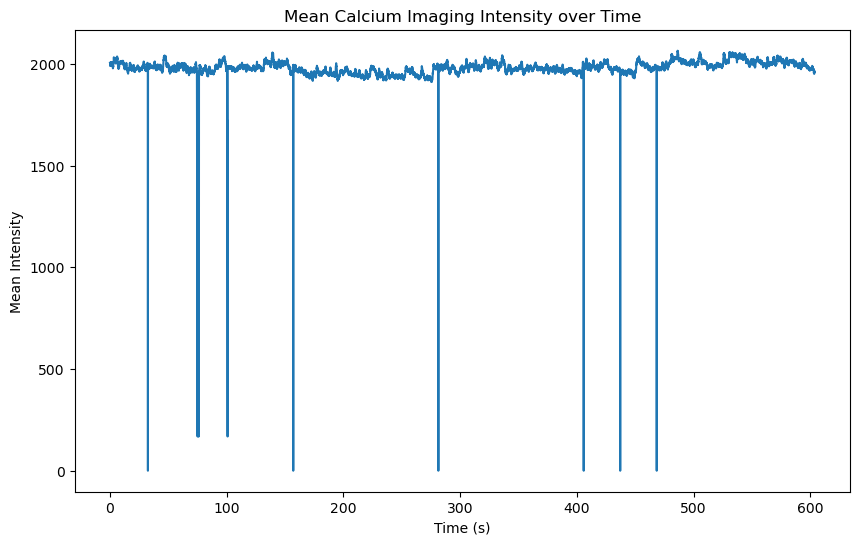

In [6]:
mean_intensities = np.mean(data[:], axis=(1, 2))
timestamps = np.linspace(0, len(mean_intensities) / ophys_series.rate, len(mean_intensities))

plt.figure(figsize=(10, 6))
plt.plot(timestamps, mean_intensities)
plt.xlabel("Time (s)")
plt.ylabel("Mean Intensity")
plt.title("Mean Calcium Imaging Intensity over Time")
plt.show()

Now we visualize single trial data. Pick the first 100 frames.

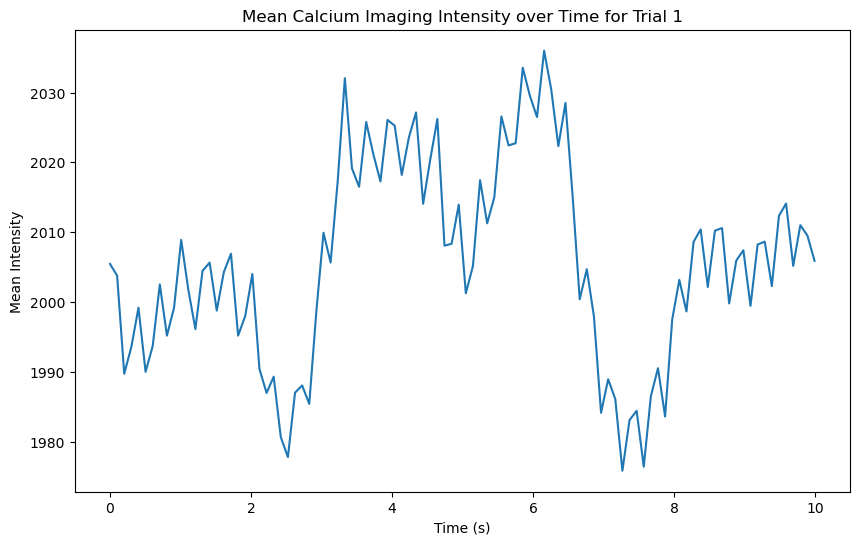

In [7]:
trial_data = data[:100]
mean_intensities = np.mean(trial_data[:], axis=(1, 2))
timestamps = np.linspace(0, len(mean_intensities) / ophys_series.rate, len(mean_intensities))

plt.figure(figsize=(10, 6))
plt.plot(timestamps, mean_intensities)
plt.xlabel("Time (s)")
plt.ylabel("Mean Intensity")
plt.title("Mean Calcium Imaging Intensity over Time for Trial 1")
plt.show()

Another way to inspect the data is to look at the spatial masks


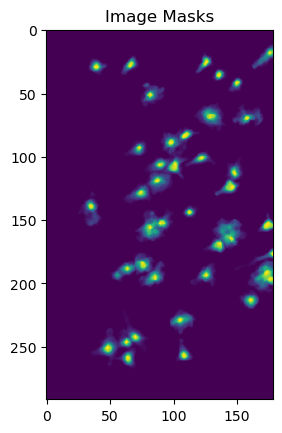

In [8]:
plane_segmentation = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]
image_masks = plane_segmentation.image_mask[:]

plt.imshow(np.max(image_masks, axis=0))
plt.title("Image Masks")
plt.show()

## Summary and Future Directions

In this notebook, we have demonstrated how to load and visualize calcium imaging data from a DANDI archive Dandiset. We have shown how to connect to the archive, load an NWB file, and plot the mean intensity over time.

Possible future directions for analysis include:

-   Analyzing individual cell activity.
-   Performing spike detection and spike sorting.
-   Correlating neural activity with behavior.